In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
from IPython.display import display
from IPython.display import clear_output

pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib notebook

WARNING: Very slight Campaign 1 Spoilers ahead, if any.

**To those who have never seen Critical Role, I hope this encourages you to give it a try. To those who are avid fans of the show, I hope this would help us see these characters in a new light.
**

# All things begin with an introduction

Dungeons and Dragons has always been seen as one of the geekiest hobbies anybody could have. It's a game where people create characters to act them out in fantasy settings. If a group of geeks playing make-believe isn't enough, the rules of the game are longer than most novels.

But if I didn't have anything interesting to say about it, I wouldn't bother with this post. 

Well, today I'm going to tell you about the group that helped make Dungeons and Dragons cool - Critical Role.


# What is Critical Role?

Critical Role is, in their own words, a show "where a bunch of nerdy-ass voice actors sit around and play Dungeons and Dragons." 

It started off as a casual house game with friends before someone had the bright idea to start streaming on Twitch. And before you ask yourself, "Who would spend time to watch grown adults play Dungeons and Dragons?"

Me, obviously. Together with a few hundreds of thousands of followers. Let's take a look at some viewership statistics from Twitch and Google.

# Google Trends and shit

Google Trends
Twitch Viewership


# Meet the Players
Dungeons and Dragons is, at its core, a social game. When you play, you're plopped into a fantasy world governed by a Dungeon Master. You and a group of friends, all playing their own fantasy personas, get to interact with this world. You make your own choices and suffer your own consequences.

So like any Dungeons and Dragons game, the success of Critical Role is largely driven by the creative minds of its Dungeon Master and its players. When they're not busy with Critical Role, each and every one of them have earned their stripes in the voice acting industry. You've probably heard some of their work in the games you've played and media you've consumed.

Let's meet the personalities that make up the game.

[toggle toggle thing to show voice actor + character played, random quote / backstory?]
"Travis Willingham as Grog Strongjaw. 'I would like to rage.' Works include blehbleh"



# Transcripts 

This humble study would not have been possible without the hard work from Critical Role Transcripts. Their passion for the show shines in the transcripts they've encoded. These transcripts record in closed captions, what has been said in each episode. This is a powerful thing.

**Basic Datamancy**
* A basic application is just counting how many words were said by each actor in each episode.

* To simplify this view, let's just look at a boxplot per actor.
* Matt Mercer, the Dungeon Master, says 5x as many words per episode versus the rest of his cast.
* Without him, let's look at the rest of the cast.
* Laura, who plays Vex'ahlia is the most consistently verbose, with Sam following.
* Taliesin Jaffe, who plays Percy, is the most varied.
* Ashley Johnson, who plays the cleric Pike, only usually says around 1k words in the episodes she plays in.


**Vocabulary**
* To-do: Use 'treated' dataset,concatenate words to one long string, then find uniques, for each actor. Put that into a list, to eventually convert into a dataframe. Count length of list into a separate variable at the end of the loop.

**Here are the words they say the most**
* To-do: Dataset of actors to word counts. Actor | Word | Count | % | Attach Emotion


**When you remove the most common words collectively used, we begin to get an idea of what they talk about**
* To-do: Find most collectively used words
* Try topic modeling with Latent Semantic Analysis to find topics

**The Emotional Spectrum**
* Words can convey a spectrum of emotions. Given what we know about their usual speaking tendencies, we can "score" our actors and their characters on certain emotions.

* To-do: Radar chart of emotions, one radar per character. Do not overlap.

**There are some variations over episodes as well**

In [25]:
df = pd.read_csv('data/complete.csv')

In [26]:
df.head()

,file,campaign,episode,actor,word_count,vocabulary,anger_norm,anticipation_norm,disgust_norm,fear_norm,...,trust_norm,matt_cnt,marisha_cnt,travis_cnt,laura_cnt,sam_cnt,liam_cnt,ashley_cnt,taliesin_cnt,orion_cnt
0,C1E001_FINAL_V2_MATT_treated.txt,C1,1,MATT,16201,2067,0.162380,0.109077,0.087347,0.174167,...,0.183918,6,9,11,4,7,3,8,4,14
1,C1E002_FINAL_MATT_treated.txt,C1,2,MATT,12690,1742,0.183639,0.098666,0.073454,0.153885,...,0.176107,2,13,40,6,14,6,2,9,13
2,C1E003_FINAL_MATT_treated.txt,C1,3,MATT,12197,1708,0.119209,0.097274,0.071381,0.183727,...,0.206906,3,2,13,3,6,3,2,2,10
3,C1E004_FINAL_MATT_treated.txt,C1,4,MATT,18461,2343,0.166411,0.106248,0.071372,0.171692,...,0.181523,12,5,24,7,24,5,19,12,9
4,C1E005_FINAL_MATT_treated.txt,C1,5,MATT,14968,1864,0.181923,0.086642,0.088653,0.190115,...,0.143972,2,13,39,6,24,8,20,10,12


In [29]:
campaignDf = df[(df['episode'] != 'Others') & (df['campaign'] == 'C1') & (df['word_count'] >= 50)]
campaignDf['episode'] = campaignDf['episode'].astype(int)

In [30]:
campaignDf.head()

,file,campaign,episode,actor,word_count,vocabulary,anger_norm,anticipation_norm,disgust_norm,fear_norm,...,trust_norm,matt_cnt,marisha_cnt,travis_cnt,laura_cnt,sam_cnt,liam_cnt,ashley_cnt,taliesin_cnt,orion_cnt
0,C1E001_FINAL_V2_MATT_treated.txt,C1,1,MATT,16201,2067,0.162380,0.109077,0.087347,0.174167,...,0.183918,6,9,11,4,7,3,8,4,14
1,C1E002_FINAL_MATT_treated.txt,C1,2,MATT,12690,1742,0.183639,0.098666,0.073454,0.153885,...,0.176107,2,13,40,6,14,6,2,9,13
2,C1E003_FINAL_MATT_treated.txt,C1,3,MATT,12197,1708,0.119209,0.097274,0.071381,0.183727,...,0.206906,3,2,13,3,6,3,2,2,10
3,C1E004_FINAL_MATT_treated.txt,C1,4,MATT,18461,2343,0.166411,0.106248,0.071372,0.171692,...,0.181523,12,5,24,7,24,5,19,12,9
4,C1E005_FINAL_MATT_treated.txt,C1,5,MATT,14968,1864,0.181923,0.086642,0.088653,0.190115,...,0.143972,2,13,39,6,24,8,20,10,12


<IPython.core.display.Javascript object>


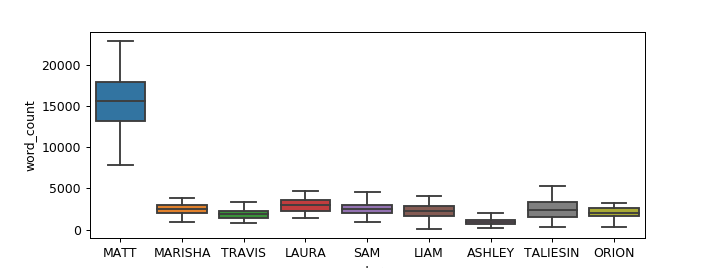

In [31]:
#Create blank space to draw lines on
fig0, ax0 = plt.subplots(figsize=(8, 3))


sns.boxplot(x = 'actor'
             , y = 'word_count'
             , data = campaignDf
             , ax = ax0
             , showfliers = False)


Button(description='Submit', style=ButtonStyle())

<IPython.core.display.Javascript object>


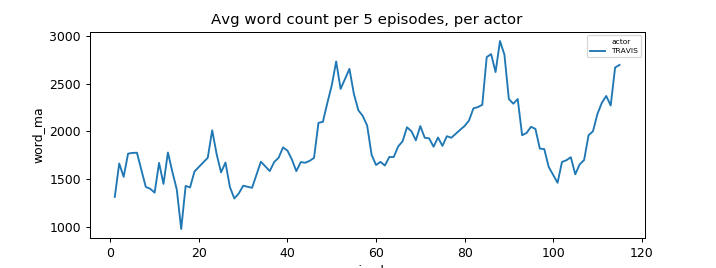

In [46]:
actorList = ['MATT', 'MARISHA', 'TRAVIS', 'LAURA', 'SAM', 'LIAM', 'ASHLEY', 'TALIESIN', 'ORION']

avgSlider = widgets.IntSlider(
    min=1,
    max=15,
    step=1,
    description='Steps:',
    value=5
)

actorDropdown = widgets.Dropdown(
    description = 'Actor: ',
    value = 'MATT',
    options = actorList
)

submitBtn = widgets.Button(description = 'Submit')

container = widgets.HBox(children=[actorDropdown, avgSlider])

display(container)
display(submitBtn)

#Create blank space to draw lines on
fig, ax1 = plt.subplots(figsize=(8, 3))
# ax1.set_ylim([0, 0.4])


#Update the graph
def update(change):
    
    #Update the temporary dataframe
    tempDf = campaignDf[['file'
                         , 'campaign'
                         , 'episode'
                         , 'actor'
                         , 'word_count'.format(emotionsDropdown.value)]]
    
    tempDf = tempDf[tempDf['actor'] == actorDropdown.value]
    
    tempDf['word_ma'] = tempDf.groupby('actor')['word_count'].transform(lambda x: x.rolling(avgSlider.value, 1).mean())
    
    #Remove current lines
    ax1.lines = []
    
    ax1.relim()
    # update ax.viewLim using the new dataLim
    ax1.autoscale_view()
    
    #Draw lineplot
    sns.lineplot(x = 'episode'
                 , y = 'word_ma'
                 , hue = 'actor'
                 , data = tempDf
                 , ax = ax1
                )
    
    ax1.set_title('Avg word count per {avg} episodes, per actor'.format(avg = avgSlider.value))
    ax1.legend(loc=1, prop={'size': 6})
    
    return tempDf
    
submitBtn.on_click(update)


<IPython.core.display.Javascript object>


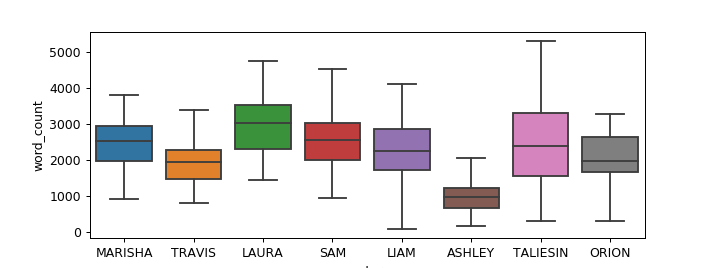

In [32]:
#Create blank space to draw lines on
fig0, ax0 = plt.subplots(figsize=(8, 3))


sns.boxplot(x = 'actor'
             , y = 'word_count'
             , data = campaignDf[campaignDf['actor'] != 'MATT']
             , ax = ax0
             , showfliers = False)


Button(description='Submit', style=ButtonStyle())

<IPython.core.display.Javascript object>


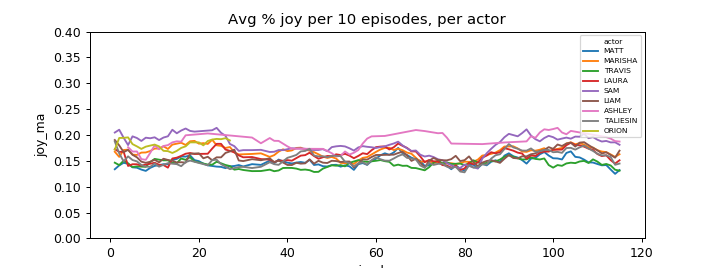

In [33]:
emotionsList = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

avgSlider = widgets.IntSlider(
    min=1,
    max=15,
    step=1,
    description='Steps:',
    value=5
)

emotionsDropdown = widgets.Dropdown(
    description = 'Emotion: ',
    value = 'anger',
    options = emotionsList
)

submitBtn = widgets.Button(description = 'Submit')

container = widgets.HBox(children=[emotionsDropdown, avgSlider])

display(container)
display(submitBtn)

#Create blank space to draw lines on
fig, ax1 = plt.subplots(figsize=(8, 3))
ax1.set_ylim([0, 0.4])


#Update the graph
def update(change):
    
    #Update the temporary dataframe
    tempDf = campaignDf[['file'
                         , 'campaign'
                         , 'episode'
                         , 'actor'
                         , '{}_norm'.format(emotionsDropdown.value)]]
    
    tempDf['{}_ma'.format(emotionsDropdown.value)] = tempDf.groupby('actor')['{}_norm'.format(emotionsDropdown.value)].transform(lambda x: x.rolling(avgSlider.value, 1).mean())
    
    #Remove current lines
    ax1.lines = []
    
    
    #Draw lineplot
    sns.lineplot(x = 'episode'
                 , y = '{}_ma'.format(emotionsDropdown.value)
                 , hue = 'actor'
                 , data = tempDf
                 , ax = ax1
                )
    
    ax1.set_title('Avg % {emotion} per {avg} episodes, per actor'.format(emotion = emotionsDropdown.value, avg = avgSlider.value))
    ax1.legend(loc=1, prop={'size': 6})
submitBtn.on_click(update)


In [21]:
campaignDf[campaignDf['actor'] == 'TALIESIN'].head(30)

,file,campaign,episode,actor,word_count,vocabulary,anger_norm,anticipation_norm,disgust_norm,fear_norm,...,trust_norm,matt_cnt,marisha_cnt,travis_cnt,laura_cnt,sam_cnt,liam_cnt,ashley_cnt,taliesin_cnt,orion_cnt
1310,C1E001_FINAL_V2_TALIESIN_treated.txt,C1,1,TALIESIN,1409,409,0.112642,0.124395,0.051548,0.180396,...,0.210404,0,0,1,0,0,0,0,9,0
1311,C1E002_FINAL_TALIESIN_treated.txt,C1,2,TALIESIN,1705,435,0.166243,0.121965,0.050414,0.163913,...,0.159147,0,0,1,0,0,0,0,7,0
1312,C1E003_FINAL_TALIESIN_treated.txt,C1,3,TALIESIN,776,220,0.147522,0.139730,0.071143,0.209499,...,0.148007,0,0,1,0,0,0,0,0,0
1313,C1E004_FINAL_TALIESIN_treated.txt,C1,4,TALIESIN,1991,500,0.119574,0.103598,0.053982,0.166449,...,0.218279,4,0,3,0,1,1,0,3,2
1314,C1E005_FINAL_TALIESIN_treated.txt,C1,5,TALIESIN,1332,300,0.168100,0.115122,0.062305,0.174339,...,0.134030,1,0,1,0,1,0,0,0,0
1315,C1E006_FINAL_TALIESIN_treated.txt,C1,6,TALIESIN,950,321,0.176858,0.131345,0.046109,0.200270,...,0.135775,0,0,1,0,0,0,0,7,0
1316,C1E007_FINAL_TALIESIN_treated.txt,C1,7,TALIESIN,1029,239,0.214491,0.088199,0.077409,0.149660,...,0.121365,0,2,0,0,0,1,1,0,0
1317,C1E008_FINAL_TALIESIN_treated.txt,C1,8,TALIESIN,738,235,0.182583,0.136322,0.053439,0.218440,...,0.157644,1,1,1,0,1,0,0,0,0
1318,C1E009_FINAL_TALIESIN_treated.txt,C1,9,TALIESIN,1410,396,0.164143,0.111046,0.053105,0.200969,...,0.156015,1,1,2,0,1,0,3,7,0
1319,C1E010_FINAL_TALIESIN_treated.txt,C1,10,TALIESIN,3039,738,0.114895,0.132926,0.045659,0.143694,...,0.188844,5,1,3,0,2,0,0,13,1
